

# Project: Investigating The Effect of Financial Aid on African Countries

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen datasets from [Gapminder](https://www.gapminder.org/data/). I chose the aid received per person dataset from the economy section and the income per person dataset. I want to have a glimse of whether financial aid is really helping the receiving countries especially in Africa. I will explore the trends of how much aid per person an african country is receiving through the years and how the income per person is changing. For sure, income per person is a complex factor to pin down on a single paramter so I won't expect to have sharp conclusions only inferences or inclinations. This might give us a direction on what else can be analyzed to get a clearer picture.

In [1]:
# imporying packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# loading data
df_aid = pd.read_csv('aid_received_per_person_current_us.csv')
df_aid.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,1.91000,3.78,1.81,3.84000,4.74,5.420,5.000,3.95,2.75000,...,215.00,214.00,224.00,214.00,160.00,148.00,124.00,115.000,105.00,102.00
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122.00,125.00,131.00,120.00,93.30,97.30,116.00,59.500,58.50,120.00
2,Algeria,32.10000,38.60,34.20,23.70000,18.60,11.700,9.840,8.11,8.75000,...,8.56,5.59,5.27,3.94,5.33,4.13,1.79,3.560,4.22,3.41
3,Angola,-0.00917,4.26,NaN,0.00528,NaN,0.192,0.495,3.15,0.00173,...,10.60,10.10,7.97,9.70,11.00,8.74,13.60,7.160,7.49,5.18
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.10,223.00,173.00,23.10,17.40,27.50,15.90,0.635,104.00,174.00


In [3]:
df_aid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  157 non-null    object 
 1   1960     105 non-null    float64
 2   1961     112 non-null    float64
 3   1962     105 non-null    float64
 4   1963     111 non-null    float64
 5   1964     108 non-null    float64
 6   1965     109 non-null    float64
 7   1966     117 non-null    float64
 8   1967     118 non-null    float64
 9   1968     114 non-null    float64
 10  1969     116 non-null    float64
 11  1970     114 non-null    float64
 12  1971     117 non-null    float64
 13  1972     116 non-null    float64
 14  1973     124 non-null    float64
 15  1974     125 non-null    float64
 16  1975     129 non-null    float64
 17  1976     128 non-null    float64
 18  1977     129 non-null    float64
 19  1978     130 non-null    float64
 20  1979     131 non-null    float64
 21  1980     131 non

In [4]:
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [5]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


By inspecting the five datasets I am using, I observed the following:
* They don't have the same number of countries which won't matter since I will be focusing on African ones only. I will need to make sure they have the same african countries later and drop all other ones. I might find it useful to make the countries column the index.
* They don't share the same timeframe as well. I noticed that in the income dataframe there are predictions for the future till the year 2040. I checked the data documentations [here](https://www.gapminder.org/data/documentation/gd001/) to make sure. To fix that I will use the years included in them all so that the results make sense. The years range I will use is from 1995 to 2017. All other years columns will be dropped.
* I noticed that the earlier the year the more null values there are which is understandable. The lack of techologies or means to collect these data back then is a reasonable explanation. However, this might not be an issue after dropping the years that are not included in all the data sets. I will deal with null values after dropping the unwanted years and selected countries in Africa only.
* The income dataset has int instead of float for all the years. I think this wouldn't pose a problem. So I will not change it and see what happens.




### Data Cleaning 

In [6]:
#selecting the years range
years_list = ['country','1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017']
df_aid = df_aid[years_list]
df_aid.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,11.7,9.0,11.90,8.32,7.08,6.55,19.00,54.10,65.00,...,174.00,215.00,214.00,224.00,214.00,160.00,148.00,124.00,115.000,105.00
1,Albania,56.7,71.5,53.40,85.90,157.00,103.00,87.70,101.00,115.00,...,124.00,122.00,125.00,131.00,120.00,93.30,97.30,116.00,59.500,58.50
2,Algeria,10.3,10.5,8.33,13.90,4.51,6.44,6.32,5.84,7.42,...,9.35,8.56,5.59,5.27,3.94,5.33,4.13,1.79,3.560,4.22
3,Angola,29.9,31.9,23.80,21.80,24.40,18.40,16.70,23.60,27.20,...,17.00,10.60,10.10,7.97,9.70,11.00,8.74,13.60,7.160,7.49
4,Antigua and Barbuda,33.1,55.1,60.70,136.00,145.00,130.00,111.00,173.00,71.00,...,71.10,49.10,223.00,173.00,23.10,17.40,27.50,15.90,0.635,104.00


Preparing a list of the african countries contained in the aid dataset. I have chosen the aid dataset specifically beacause it has the least number of countries (157 country) compared to the other dataset.

In [7]:
df_income = df_income[years_list]

In [8]:
allafrican_countries = ['Algeria','Egypt', 'Libya','Morocco','Tunisia','Burundi','Comoros','Djibouti','Eritrea','Ethiopia',
'Kenya','Madagascar','Malawi','Mauritius','Mayotte','Mozambique','Rwanda','Somalia','Sudan','Uganda','Tanzania','Zambia','Zimbabwe','Angola','Cameroon','Chad','Congo','Equatorial Guinea','Gabon','Botswana','Lesotho',
                     'Namibia','South Africa','Swaziland','Benin','Burkina Faso','Cape Verde','Gambia','Ghana','Guinea',
                     'Guinea-Bissau','Liberia','Mali','Mauritania','Niger','Nigeria','Senegal','Sierra Leone','Togo']
print(allafrican_countries)

['Algeria', 'Egypt', 'Libya', 'Morocco', 'Tunisia', 'Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique', 'Rwanda', 'Somalia', 'Sudan', 'Uganda', 'Tanzania', 'Zambia', 'Zimbabwe', 'Angola', 'Cameroon', 'Chad', 'Congo', 'Equatorial Guinea', 'Gabon', 'Botswana', 'Lesotho', 'Namibia', 'South Africa', 'Swaziland', 'Benin', 'Burkina Faso', 'Cape Verde', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo']


In [9]:
allcountries_list = df_aid['country'].tolist()
print(allcountries_list)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyz Republic', 'Lao', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', '

In [10]:
af_set = set(allafrican_countries)
all_set = set(allcountries_list)

In [11]:
af_set.issubset(all_set)

False

In [12]:
af = all_set.intersection(af_set)
print(af)

{'Cameroon', 'South Africa', 'Angola', 'Zimbabwe', 'Djibouti', 'Benin', 'Madagascar', 'Libya', 'Comoros', 'Rwanda', 'Lesotho', 'Cape Verde', 'Burkina Faso', 'Niger', 'Mauritania', 'Equatorial Guinea', 'Uganda', 'Tanzania', 'Ghana', 'Zambia', 'Mauritius', 'Senegal', 'Mozambique', 'Algeria', 'Chad', 'Eritrea', 'Botswana', 'Morocco', 'Ethiopia', 'Liberia', 'Tunisia', 'Sierra Leone', 'Togo', 'Egypt', 'Sudan', 'Gambia', 'Gabon', 'Guinea-Bissau', 'Burundi', 'Kenya', 'Nigeria', 'Guinea', 'Namibia', 'Malawi', 'Somalia', 'Mali'}


In [13]:
african_countries = list(af)
print(african_countries)

['Cameroon', 'South Africa', 'Angola', 'Zimbabwe', 'Djibouti', 'Benin', 'Madagascar', 'Libya', 'Comoros', 'Rwanda', 'Lesotho', 'Cape Verde', 'Burkina Faso', 'Niger', 'Mauritania', 'Equatorial Guinea', 'Uganda', 'Tanzania', 'Ghana', 'Zambia', 'Mauritius', 'Senegal', 'Mozambique', 'Algeria', 'Chad', 'Eritrea', 'Botswana', 'Morocco', 'Ethiopia', 'Liberia', 'Tunisia', 'Sierra Leone', 'Togo', 'Egypt', 'Sudan', 'Gambia', 'Gabon', 'Guinea-Bissau', 'Burundi', 'Kenya', 'Nigeria', 'Guinea', 'Namibia', 'Malawi', 'Somalia', 'Mali']


Getting the countries in Africa only in the aid dataframe.

Note:
I have tried many ways to filter off any countries other than the african ones. I tried loops on the african list and the set version of it and used the query method inside it. I got different kinds of errors related to indices and what not. I also tried converting the african list to a series and adding it to the dataframe as a new column. However, that missed up the arrangement of the countries with its actual value. Please direct me to the best way to do this. 

In [14]:
#step 1
df_aidtrans = df_aid.set_index('country').transpose()
df_aid.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,11.7,9.0,11.90,8.32,7.08,6.55,19.00,54.10,65.00,...,174.00,215.00,214.00,224.00,214.00,160.00,148.00,124.00,115.000,105.00
1,Albania,56.7,71.5,53.40,85.90,157.00,103.00,87.70,101.00,115.00,...,124.00,122.00,125.00,131.00,120.00,93.30,97.30,116.00,59.500,58.50
2,Algeria,10.3,10.5,8.33,13.90,4.51,6.44,6.32,5.84,7.42,...,9.35,8.56,5.59,5.27,3.94,5.33,4.13,1.79,3.560,4.22
3,Angola,29.9,31.9,23.80,21.80,24.40,18.40,16.70,23.60,27.20,...,17.00,10.60,10.10,7.97,9.70,11.00,8.74,13.60,7.160,7.49
4,Antigua and Barbuda,33.1,55.1,60.70,136.00,145.00,130.00,111.00,173.00,71.00,...,71.10,49.10,223.00,173.00,23.10,17.40,27.50,15.90,0.635,104.00


In [15]:
df_aidtrans.head()

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Azerbaijan,Bahamas,Bahrain,...,Ukraine,United Arab Emirates,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1995,11.70,56.7,10.30,29.9,33.1,4.25,67.7,15.6,15.7,177.0,...,NaN,2.24,21.40,3.67,265.0,2.050,10.4,11.5,223.0,43.1
1996,9.00,71.5,10.50,31.9,55.1,3.47,92.3,12.4,NaN,229.0,...,NaN,NaN,11.30,3.78,179.0,1.610,12.0,16.3,65.1,32.2
1997,11.90,53.4,8.33,23.8,60.7,2.78,53.1,23.5,NaN,253.0,...,NaN,NaN,11.40,5.91,155.0,0.324,11.0,22.2,63.5,28.9
1998,8.32,85.9,13.90,21.8,136.0,2.05,62.5,15.2,NaN,325.0,...,NaN,NaN,8.36,6.57,166.0,1.730,13.5,24.0,35.3,22.2
1999,7.08,157.0,4.51,24.4,145.0,2.26,67.7,21.4,NaN,97.2,...,NaN,NaN,7.74,6.43,172.0,1.840,15.7,27.2,61.5,20.7


In [16]:
#step 2
df_aidtrans = df_aidtrans[african_countries]

In [17]:
#step 3
df_africanaid = df_aidtrans.transpose().reset_index()


In [18]:
df_africanaid

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Cameroon,32.60,29.400,34.900,33.90,28.700,24.30,28.80,37.00,52.70,...,28.70,32.50,26.60,29.30,27.80,34.10,37.700,28.50,31.60,49.500
1,South Africa,9.32,8.580,11.500,11.80,12.300,10.90,9.41,11.00,13.70,...,22.40,21.30,20.20,26.90,20.20,24.10,19.800,25.60,21.00,17.800
2,Angola,29.90,31.900,23.800,21.80,24.400,18.40,16.70,23.60,27.20,...,17.00,10.60,10.10,7.97,9.70,11.00,8.740,13.60,7.16,7.490
3,Zimbabwe,43.10,32.200,28.900,22.20,20.700,14.80,13.40,16.70,15.60,...,49.50,58.80,56.10,56.00,76.40,62.00,56.000,57.10,46.60,51.000
4,Djibouti,167.00,151.000,130.000,119.00,107.000,101.00,81.00,99.20,104.00,...,172.00,200.00,157.00,166.00,171.00,169.00,185.000,190.00,199.00,151.000
5,Benin,47.50,47.300,35.200,31.70,31.900,35.60,39.60,30.40,40.20,...,73.20,75.70,74.90,71.10,52.20,66.00,58.300,41.30,46.10,60.800
6,Madagascar,22.20,25.500,58.400,32.70,23.700,20.60,23.00,22.30,31.60,...,42.40,21.10,22.60,20.60,16.50,21.70,24.900,28.00,25.00,30.500
7,Libya,1.18,0.749,0.778,1.07,0.891,NaN,NaN,NaN,NaN,...,12.20,6.53,1.23,103.00,13.90,20.40,33.100,24.50,27.60,65.600
8,Comoros,87.50,80.200,60.200,78.80,41.800,35.60,49.80,48.40,42.20,...,64.00,75.40,101.00,78.30,140.00,110.00,98.700,84.60,67.60,82.600
9,Rwanda,119.00,77.400,35.800,50.30,49.700,40.50,37.00,42.70,39.30,...,98.20,95.50,103.00,123.00,83.30,100.00,93.400,95.70,98.60,103.000


In [19]:
df_africanaid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  46 non-null     object 
 1   1995     46 non-null     float64
 2   1996     46 non-null     float64
 3   1997     46 non-null     float64
 4   1998     46 non-null     float64
 5   1999     46 non-null     float64
 6   2000     45 non-null     float64
 7   2001     45 non-null     float64
 8   2002     45 non-null     float64
 9   2003     45 non-null     float64
 10  2004     45 non-null     float64
 11  2005     46 non-null     float64
 12  2006     46 non-null     float64
 13  2007     46 non-null     float64
 14  2008     46 non-null     float64
 15  2009     46 non-null     float64
 16  2010     46 non-null     float64
 17  2011     46 non-null     float64
 18  2012     45 non-null     float64
 19  2013     45 non-null     float64
 20  2014     45 non-null     float64
 21  2015     45 non-nu

Since there are 11 countries which have null values at some years, it's not reasonable to drop them as this would narrow down the countries we analyze greatly. Instead, I will fill out these with the mean value for each country.

In [20]:
means = df_africanaid.mean(axis = 1)
print(means)

0      38.934783
1      16.370000
2      18.429565
3      38.500000
4     142.708696
5      50.356522
6      31.360870
7      18.136556
8      70.830435
9      76.426087
10     61.534783
11    345.130435
12     51.047826
13     36.173913
14     92.395652
15     32.619696
16     43.186957
17     46.921739
18     48.652174
19     79.239130
20     50.983043
21     65.434783
22     71.230435
23      7.141304
24     33.469565
25     73.694118
26     62.065217
27     34.113043
28     27.010435
29    125.873913
30     42.541739
31     66.382609
32     31.575652
33     21.938739
34     26.183043
35     51.634783
36     44.067391
37     78.743478
38     43.365652
39     32.643478
40     12.507391
41     35.539130
42     96.486957
43     53.565217
44     45.159565
45     57.404348
dtype: float64


In [21]:
df_africanaid.T.fillna(df_africanaid.mean(axis=1)).T

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Cameroon,32.6,29.4,34.9,33.9,28.7,24.3,28.8,37,52.7,...,28.7,32.5,26.6,29.3,27.8,34.1,37.7,28.5,31.6,49.5
1,South Africa,9.32,8.58,11.5,11.8,12.3,10.9,9.41,11,13.7,...,22.4,21.3,20.2,26.9,20.2,24.1,19.8,25.6,21,17.8
2,Angola,29.9,31.9,23.8,21.8,24.4,18.4,16.7,23.6,27.2,...,17,10.6,10.1,7.97,9.7,11,8.74,13.6,7.16,7.49
3,Zimbabwe,43.1,32.2,28.9,22.2,20.7,14.8,13.4,16.7,15.6,...,49.5,58.8,56.1,56,76.4,62,56,57.1,46.6,51
4,Djibouti,167,151,130,119,107,101,81,99.2,104,...,172,200,157,166,171,169,185,190,199,151
5,Benin,47.5,47.3,35.2,31.7,31.9,35.6,39.6,30.4,40.2,...,73.2,75.7,74.9,71.1,52.2,66,58.3,41.3,46.1,60.8
6,Madagascar,22.2,25.5,58.4,32.7,23.7,20.6,23,22.3,31.6,...,42.4,21.1,22.6,20.6,16.5,21.7,24.9,28,25,30.5
7,Libya,1.18,0.749,0.778,1.07,0.891,18.1366,18.1366,18.1366,18.1366,...,12.2,6.53,1.23,103,13.9,20.4,33.1,24.5,27.6,65.6
8,Comoros,87.5,80.2,60.2,78.8,41.8,35.6,49.8,48.4,42.2,...,64,75.4,101,78.3,140,110,98.7,84.6,67.6,82.6
9,Rwanda,119,77.4,35.8,50.3,49.7,40.5,37,42.7,39.3,...,98.2,95.5,103,123,83.3,100,93.4,95.7,98.6,103


Getting the countries in Africa only in the income dataframe.

In [22]:
df_incometrans = df_income.set_index('country').transpose()
df_incometrans.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1995,1030,4130,9340,26100,3410,17700,14000,2170,30400,33800,...,28500,39200,11500,2260,2610,15500,1960,3630,2040,2740
1996,942,4530,9560,27200,3750,18400,14600,2340,31200,34500,...,29200,40200,12100,2250,2620,15200,2110,3660,2110,2990
1997,865,4060,9510,29700,3890,19000,15600,2440,32100,35200,...,30300,41500,13000,2320,2690,15800,2250,3730,2130,3040
1998,800,4450,9840,30800,3950,19500,16000,2640,33200,36400,...,31300,42800,13500,2380,2760,15500,2350,3840,2060,3100
1999,735,5060,10000,31900,3900,19800,15300,2740,34500,37700,...,32200,44300,13200,2460,2720,14300,2440,3870,2100,3050


In [23]:
df_incometrans = df_incometrans[african_countries]

In [24]:
df_africanincome = df_incometrans.transpose().reset_index()


In [25]:
df_africanincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  46 non-null     object
 1   1995     46 non-null     int64 
 2   1996     46 non-null     int64 
 3   1997     46 non-null     int64 
 4   1998     46 non-null     int64 
 5   1999     46 non-null     int64 
 6   2000     46 non-null     int64 
 7   2001     46 non-null     int64 
 8   2002     46 non-null     int64 
 9   2003     46 non-null     int64 
 10  2004     46 non-null     int64 
 11  2005     46 non-null     int64 
 12  2006     46 non-null     int64 
 13  2007     46 non-null     int64 
 14  2008     46 non-null     int64 
 15  2009     46 non-null     int64 
 16  2010     46 non-null     int64 
 17  2011     46 non-null     int64 
 18  2012     46 non-null     int64 
 19  2013     46 non-null     int64 
 20  2014     46 non-null     int64 
 21  2015     46 non-null     int64 
 22  2016

In [26]:
df_africanincome

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Cameroon,2360,2400,2460,2500,2540,2560,2610,2650,2690,...,2880,2860,2880,2910,2970,3040,3130,3220,3290,3310
1,South Africa,9170,9390,9460,9360,9440,9700,9830,10100,10200,...,12100,11800,12000,12200,12300,12400,12400,12400,12200,12200
2,Angola,3410,3750,3890,3950,3900,3890,3920,4320,4300,...,6470,6290,6360,6350,6650,6730,6810,6650,6260,6050
3,Zimbabwe,2740,2990,3040,3100,3050,2950,2980,2710,2240,...,1480,1630,1930,2170,2490,2490,2510,2510,2490,2570
4,Djibouti,2520,2360,2290,2220,2210,2160,2160,2180,2210,...,2540,2630,2670,2740,2830,2920,3040,3180,3060,3400
5,Benin,1520,1530,1570,1590,1620,1670,1700,1730,1740,...,1840,1830,1820,1820,1860,1940,2000,1990,2010,2070
6,Madagascar,1400,1390,1390,1400,1420,1440,1480,1260,1340,...,1520,1420,1390,1370,1370,1360,1370,1380,1400,1420
7,Libya,22000,22400,23200,21800,21500,21900,21200,20700,23000,...,29000,28400,29500,11100,24600,21100,16000,14400,13900,17300
8,Comoros,2320,2230,2260,2230,2210,2390,2390,2380,2380,...,2380,2390,2430,2470,2480,2530,2530,2490,2490,2500
9,Rwanda,692,757,807,810,784,803,840,929,935,...,1290,1340,1400,1470,1560,1590,1670,1770,1830,1890


<a id='eda'></a>
## Exploratory Data Analysis


### What are the top 2 countries in terms of aid received and what are the bottom 2?

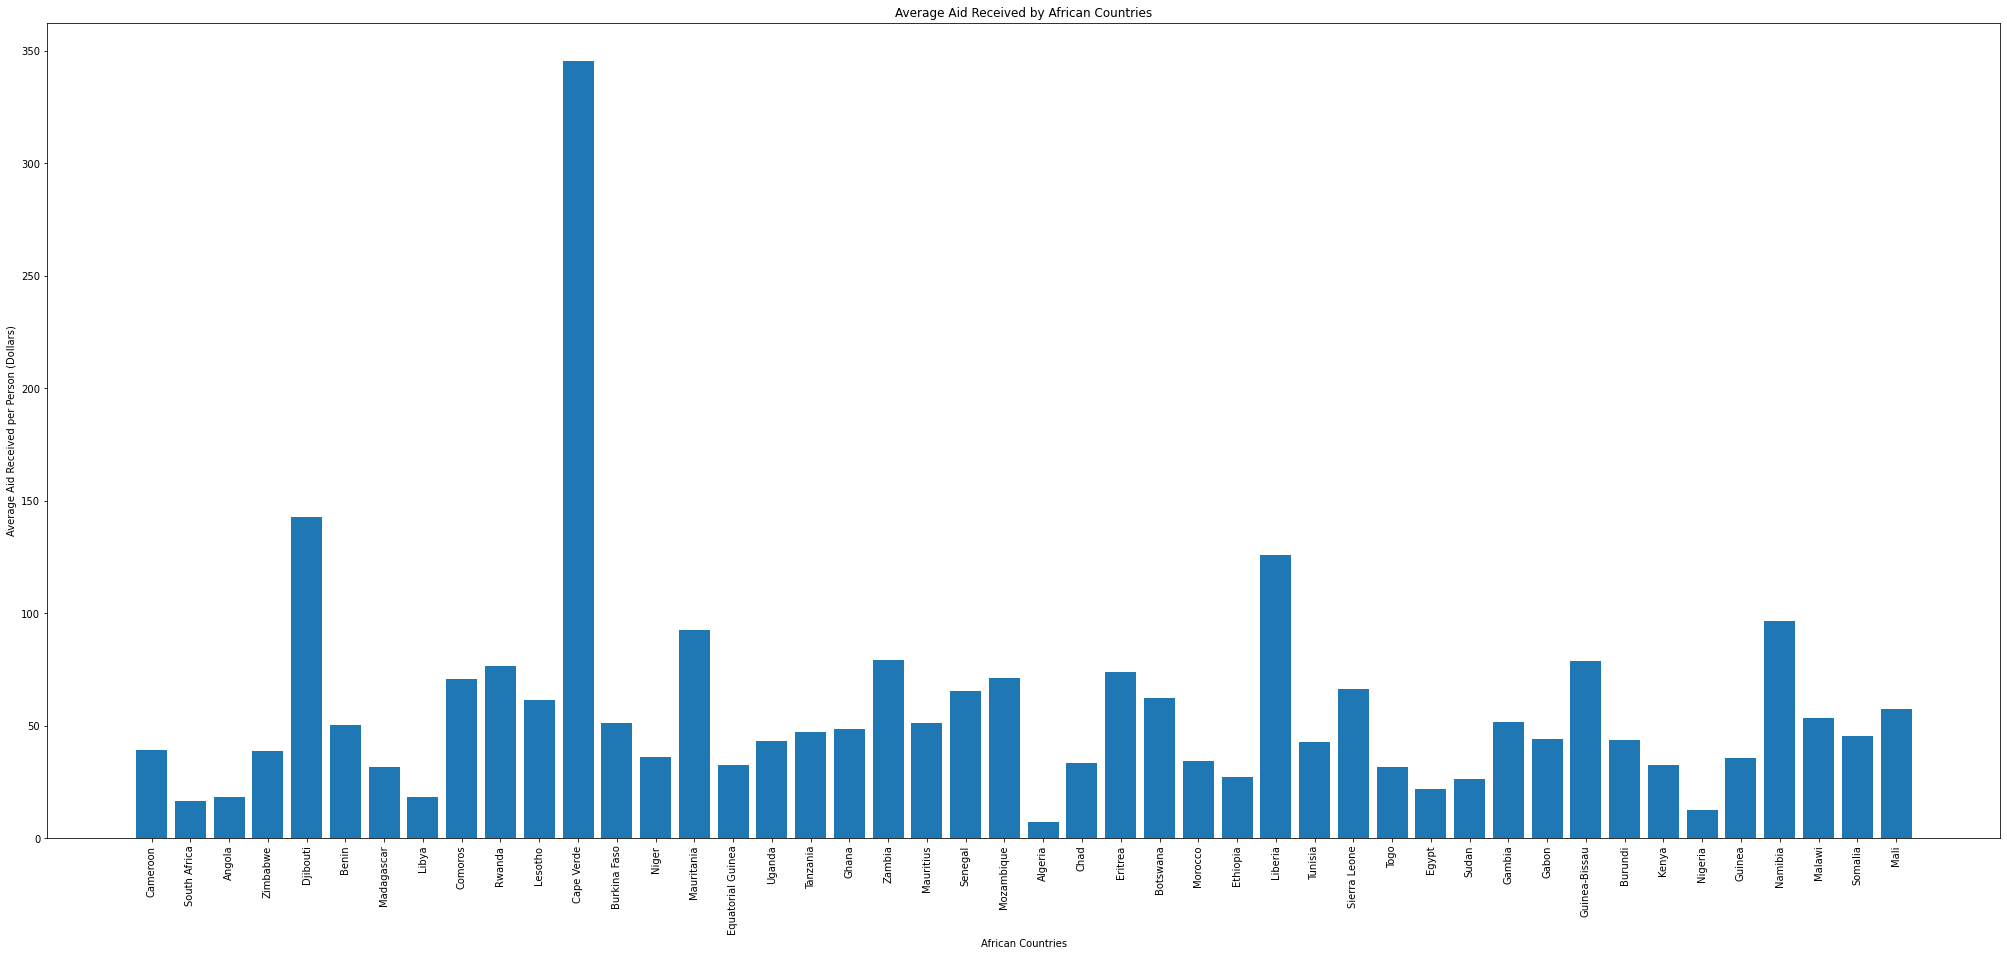

In [32]:
plt.figure(figsize=(35,15))
plt.xlabel('African Countries')
plt.ylabel('Average Aid Received per Person (Dollars)')
plt.title('Average Aid Received by African Countries')
plt.bar(df_africanaid['country'], means);
plt.xticks(rotation = 90);

From the previous figure we that the top 2 countries in receiving aid per person are (more aid to less aid): \
__Cape Verde__ \
__Djibouti__ \
While the bottom 2 are (more aid to less aid): \
__Nigeria__ \
__Algeria__ 

<a id='eda'></a>
## Exploring trends in aid and income of the top and bottom countries.

In [33]:
df_africanaid.set_index('country', inplace = True)

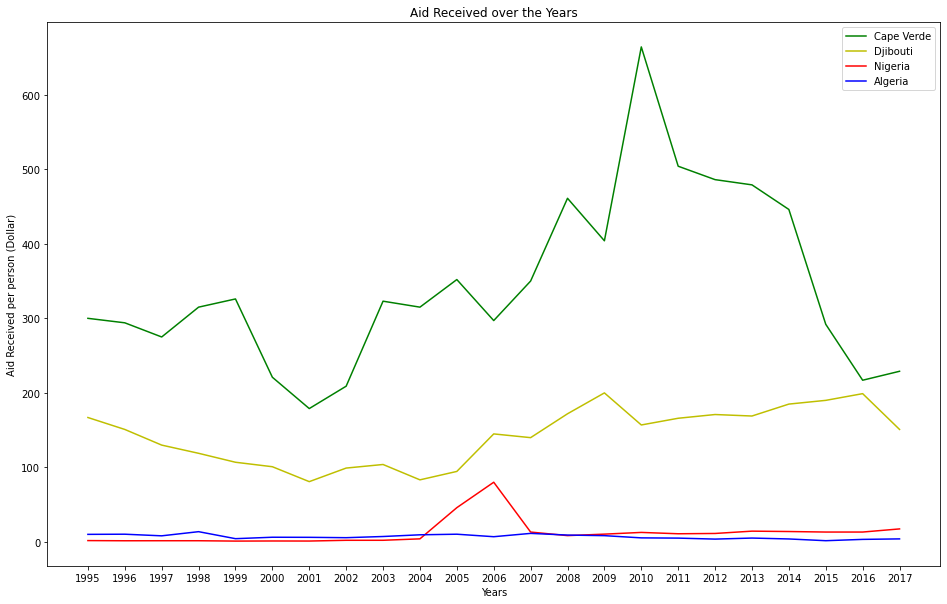

In [34]:
#Exploring how the aid per person of the top and bottom countries changed over the years
years = ['1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017']
def aidplots(cname, color):
    cplot = plt.plot(years, df_africanaid.loc[cname, :], color,label = cname)
    return cplot
plt.figure(figsize=(16,10))
plt.xlabel('Years')
plt.ylabel('Aid Received per person (Dollar)')
plt.title('Aid Received over the Years')
aidplots('Cape Verde', 'g')
aidplots('Djibouti', 'y')
aidplots('Nigeria', 'r')
aidplots('Algeria', 'b')
plt.legend(loc='best')

We can notice a trend here which is that regardless of whether a country is a top or botton receiving aid, the amount of aid per person is decreasing through the years. For cape Verde, it's the most turbulent country when it comes to the amount of aid it receives. Nigeria seems to not engage in receiving aids that much, it has a period (from 2004 to 2007) before or after that the aid is minute.

In [35]:
df_africanincome.set_index('country', inplace = True)

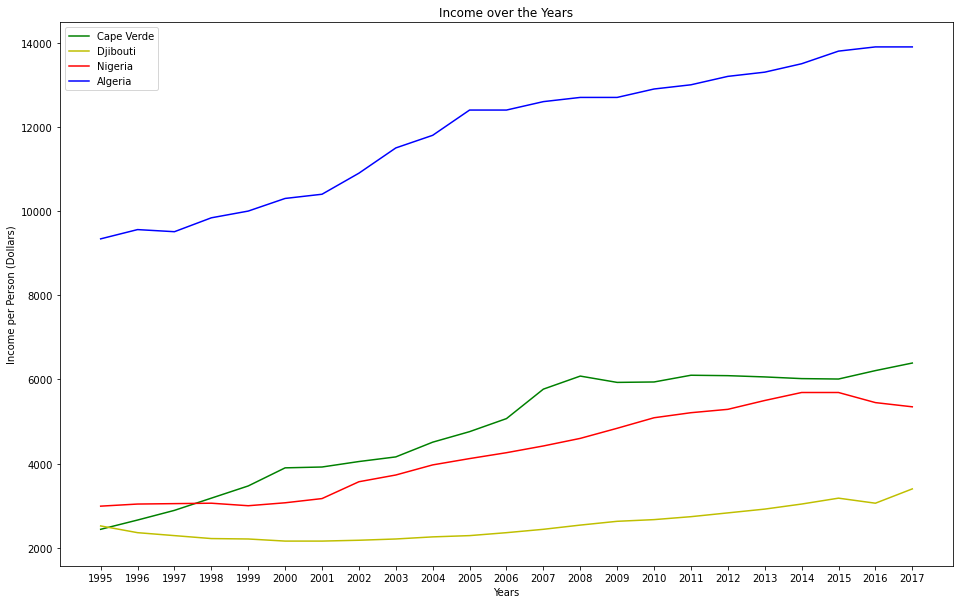

In [37]:
#Exploring how the income per person of the top and bottom countries changed over the years
years = ['1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017']
def incomeplots(cname, color):
    iplot = plt.plot(years, df_africanincome.loc[cname, :], color, label = cname)
    return iplot
plt.figure(figsize=(16,10))
plt.xlabel('Years')
plt.ylabel('Income per Person (Dollars)')
plt.title('Income over the Years')
incomeplots('Cape Verde', 'g')
incomeplots('Djibouti', 'y')
incomeplots('Nigeria', 'r')
incomeplots('Algeria', 'b')
plt.legend(loc = 'best')

We can see here that the results are not conclusive. It is most apparant for Cape Verde (the country that received the most aid per person) that significant increase in income is noticed which may mean that fininaical aid is really helping. We can compare this with Djibouti(which didn't receive as much aid and almost had the same starting point in the year 1995) to see the difference. For Algeria, it seems that the low aid it received had not affected the income per person. Nigeria on the other hand, seems to make progress and witnesing an increase in incomes even though it didn't receive as much aid as Cape verde for example. Of course there are many other factors not considered here. These are inferences constrained by the analysis done so far. 

<a id='conclusions'></a>
## Conclusions

* Cape Verde is the african country that received the __highest__ average aid per person from 1995 to 2017
* Algeria is the african country that received the __lowest__ average aid per person from 1995 to 2017
* The four countries considered (Cape Verde, Djibouti, Nigeria, Algeria) mostly took their aid in peaks not with a flat rate
* Algeria has the __highest__ income per person in the start of the years range and also at the end of it, that is in 1995 and in 2017
* Djibouti, however, started with second lowest income and ended with the __lowest__ income even though it is the second country after Cape Verde in receiving aid.
* It is observed that income per person across the four countries kept increasing over the years

<a id='limitations'></a>
## Limitations

* I observed the trends in aid receiving and income, however it is not possible to pin down how these two are tied together
* The income per person is affected by several factors other than the aid a country is receiving
* Receiving aid might be helping with other aspects than just the income. For instance, it can help with health, eduaction, food and many other areas that were not explored here.
* Still the observation that some countries kept their income increasing without receiving as much as aid as others is worth noting. This is the case of Algeria and Cape Verde. They both kept their income raising but Algeria received much less aid than Cape verde. This may have varying meanings like maybe countries who are most struggling revert to aid so they can barely keep up and maybe the opposite. Maybe receiving aid and having to pay it back x folds prevents counrtries from making enough progress. Also many factors are at play here like management, corruption or natural resources. This needs further analysis and investigation to be able to draw a conlusion and generalise on other countries.